<a href="https://colab.research.google.com/github/kari-hub/Week-9-Project/blob/master/Data_science_cohort_3_project_week_9_dataset_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="pink">Titanic dataset.</font>


Titanic data consists of information on the passengers who were aboard the Titanic which sank. We are to use it to build a model to predict whether a passenger survived the accident or not.

## **Solution**



> We have been provided with a dataset containing information regarding the passengers. We will use it to carry out a series of analysis including data cleaning, univariate and bivariate analysis and apply K-Nearest Neighbours (kNN) and Naive Bayes to the models we will create.

## Defining the question


### a) Specifying the question



> We have been provided with Titanic data consisting information on passengers on the Titanic ship. Use it to build a model that predicts whether a passenger survived the accident or not.

### b) Defining the metric of success



> For our analysis, a precision, F1 score and accuracy score of below 60% is termed as a poor model, while 80% and above would be considered as a success and our model would be termed as an accurate model.

### c) Understanding the context



 The columns in our data are explained as below:
 
> Survived - Survival (0 = No; 1 = Yes)

> Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

> Name - Name

> Sex - Sex

> Age - Age

> SibSp - Number of Siblings/Spouses Aboard

> Parch - Number of Parents/Children Aboard

> Ticket - Ticket Number

> Fare - Passenger Fare (British pound)

> Cabin - Cabin

> Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

### d) Recording the experimental design



 1. Performing EDA.
 2. Perform feature engineering if necessary.
 3. Check for multicollinearity
 4. Build the model
 5. Calculate accuracy scores and mean squared errors.
 6. Carry out model performance if necessary.
 7. Record conclusions concerning the analysis.

### e) Data Relevance



> The data provided is relevant to the analysis we are about to conduct.

### f) Appropriateness of data



> Our data requires some data cleaning procedures before builidng our prediction models.

## Reading the data



In [214]:
# Importing libraries that will use in our notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [ ]:
# Lading our training dataset

titan = pd.read_csv('/content/train (5).csv')


## Checking Data



In [ ]:
# Previewing the top of our train dataset

titan.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Previewing the bottom of our dataset

titan.tail()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
# Determining the number of records in our data

titan.shape

(891, 12)

In [ ]:
# Determining the datatypes in our data

titan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Tidying the dataset

In [ ]:
# Checking for duplicates in our data

titan.duplicated().sum()

0

In [ ]:
titan.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
titan['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [ ]:
# Checking our columns

titan.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
# Dropping unnecessary columns in our data

titan = titan.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
titan.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
# Checking for missing values in our data

titan.isnull().sum() 

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

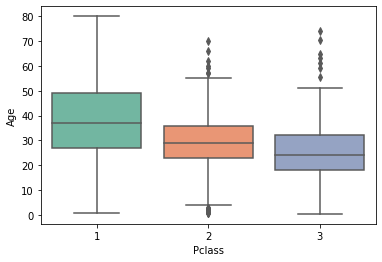

In [ ]:
# Imputing missing values
# ---
# Since the number of missing values in our age column are too many, we cannot drop them.
# Instead, we will input the average values.
# Let's look at how passenger age is related to their class as a passenger on the boat.
# 
sns.boxplot(x='Pclass', y='Age', data=titan, palette='Set2')

In [ ]:
# From our observations, we can easily use the countplot above to fill the missing values in the age column
# Most old people are seen to be in first class.
# While in the second class, the mean age is approximately 30
# In the third class, the average is about 25
# So, let's write a function that approximates a passengers age, based on their class.

def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 30
        else:
            return 25
    else:
        return Age

In [ ]:
# When we apply the function and check again for null values, we see that there are no more null values in the age variable.
#
titan['Age'] = titan[['Age', 'Pclass']].apply(age_approx, axis=1)
titan.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [ ]:
# We can drop the remaining null values in the Embarked column since they are only two

titan.dropna(axis=0, inplace=True)
titan.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
titan['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [ ]:
# Changing the datatypes of our categorical data using Label encoder

le =  LabelEncoder()

titan['Embarked'] = le.fit_transform(titan['Embarked'])
titan['Sex'] = le.fit_transform(titan['Sex'])

titan.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
dtype: object

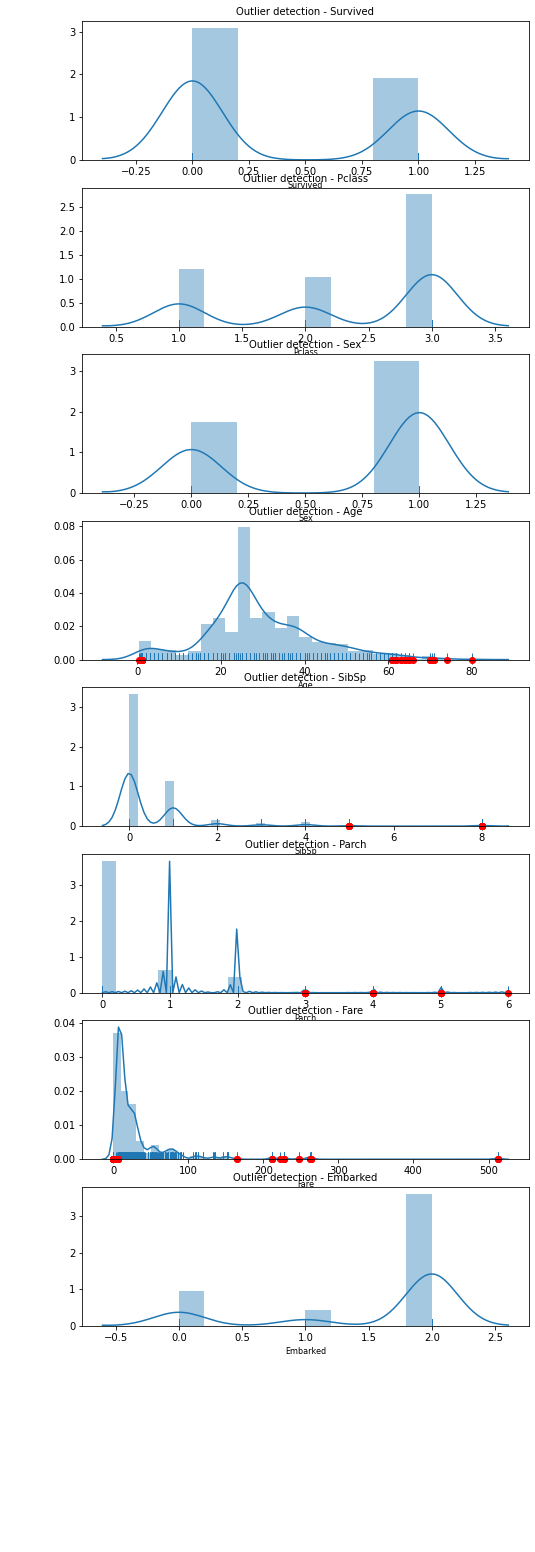

In [ ]:
# Checking for anomalies

def percentile_based_outlier(titan, threshold=95):
  diff = (100 - threshold)/2
  minval, maxval = np.percentile(titan, [diff, 100 - diff])
  return (titan < minval) | (titan > maxval)

col_names = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'] 

fig, ax = plt.subplots(len(col_names), figsize=(8, 24))

for i, col_val in enumerate(col_names):
  x = titan[col_val][:1000]
  sns.distplot(x, ax=ax[i], rug=True, hist=True)
  outliers = x[percentile_based_outlier(x)]
  ax[i].plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

  ax[i].set_title("Outlier detection - {}".format(col_val), fontsize=10)
  ax[i].set_xlabel(col_val, fontsize=8)

plt.show() 

In [ ]:
# Checking for outliers

def detect_outlier(titan):
  outliers = []
  threshold = 3
  mean_1 = np.mean(titan)
  std_1 = np.std(titan)

  for y in titan:
    z_score = (y - mean_1)/std_1
    if np.abs(z_score) > threshold:
      outliers.append(y)
  return outliers 

In [ ]:
# Counting the number of outliers in our data and their percentages

for col in titan:
  rows, columns = titan.shape
  percent_coefficient = float(100 / rows)
  outliers = detect_outlier(titan[col])
  outliers_count = len(outliers)
  outliers_percentage = outliers_count * percent_coefficient
  print(f"{col} has {outliers_count} outliers in total, which is{outliers_percentage:.2}% of data" )

Survived has 0 outliers in total, which is0.0% of data
Pclass has 0 outliers in total, which is0.0% of data
Sex has 0 outliers in total, which is0.0% of data
Age has 7 outliers in total, which is0.79% of data
SibSp has 30 outliers in total, which is3.4% of data
Parch has 15 outliers in total, which is1.7% of data
Fare has 20 outliers in total, which is2.2% of data
Embarked has 0 outliers in total, which is0.0% of data


In [ ]:
# Dropping outliers from our data
from scipy import stats

z = np.abs(stats.zscore(titan))
print(z)

[[0.78696114 0.82520863 0.73534203 ... 0.47432585 0.50023975 0.58683958]
 [1.27071078 1.57221121 1.35991138 ... 0.47432585 0.78894661 1.93955453]
 [1.27071078 0.82520863 1.35991138 ... 0.47432585 0.48664993 0.58683958]
 ...
 [0.78696114 0.82520863 1.35991138 ... 2.00611934 0.17408416 0.58683958]
 [1.27071078 1.57221121 0.73534203 ... 0.47432585 0.0422126  1.93955453]
 [0.78696114 0.82520863 0.73534203 ... 0.47432585 0.49017322 0.67635748]]


In [ ]:
# Confirming that our outliers have been dropped 
df = titan[(z < 3).all(axis=1)]

print(f"Previous dataframe size : {titan.shape[0]}")
print(f"New dataframe : {df.shape[0]}")

Previous dataframe size : 889
New dataframe : 818


In [ ]:
# Saving our data without outliers

df.to_csv('new_data.csv')

In [ ]:
# Loading the cleaned dataset

titan = pd.read_csv('new_data.csv')


In [ ]:
# Dealing with any white spaces in the data
for col in titan.columns:
    try:
        titan.col.str.strip()
    except:
        print(f"{col} column din't have white spaces.")

Unnamed: 0 column din't have white spaces.
Survived column din't have white spaces.
Pclass column din't have white spaces.
Sex column din't have white spaces.
Age column din't have white spaces.
SibSp column din't have white spaces.
Parch column din't have white spaces.
Fare column din't have white spaces.
Embarked column din't have white spaces.


## Exploratory Data Analysis


### **Univariate Analysis**

In [ ]:
# Previewin our new dataset

titan.head()

,Unnamed: 0,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,3,1,22.0,1,0,7.2500,2
1,1,1,1,0,38.0,1,0,71.2833,0
2,2,1,3,0,26.0,0,0,7.9250,2
3,3,1,1,0,35.0,1,0,53.1000,2
4,4,0,3,1,35.0,0,0,8.0500,2


In [ ]:
# Dropping the Unnamed column

titan = titan.drop(columns=['Unnamed: 0'])

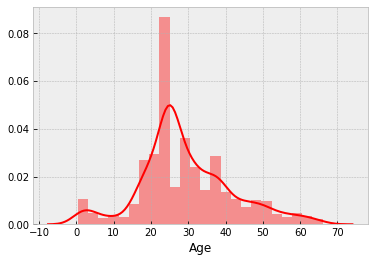

In [ ]:
# We will create a distribution plot for our age column
plt.style.use('bmh')

sns.distplot(titan.Age, color='red');

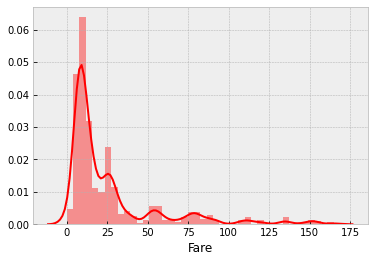

In [ ]:
# Creating a distribution plot for our fare column

sns.distplot(titan.Fare, color='red')

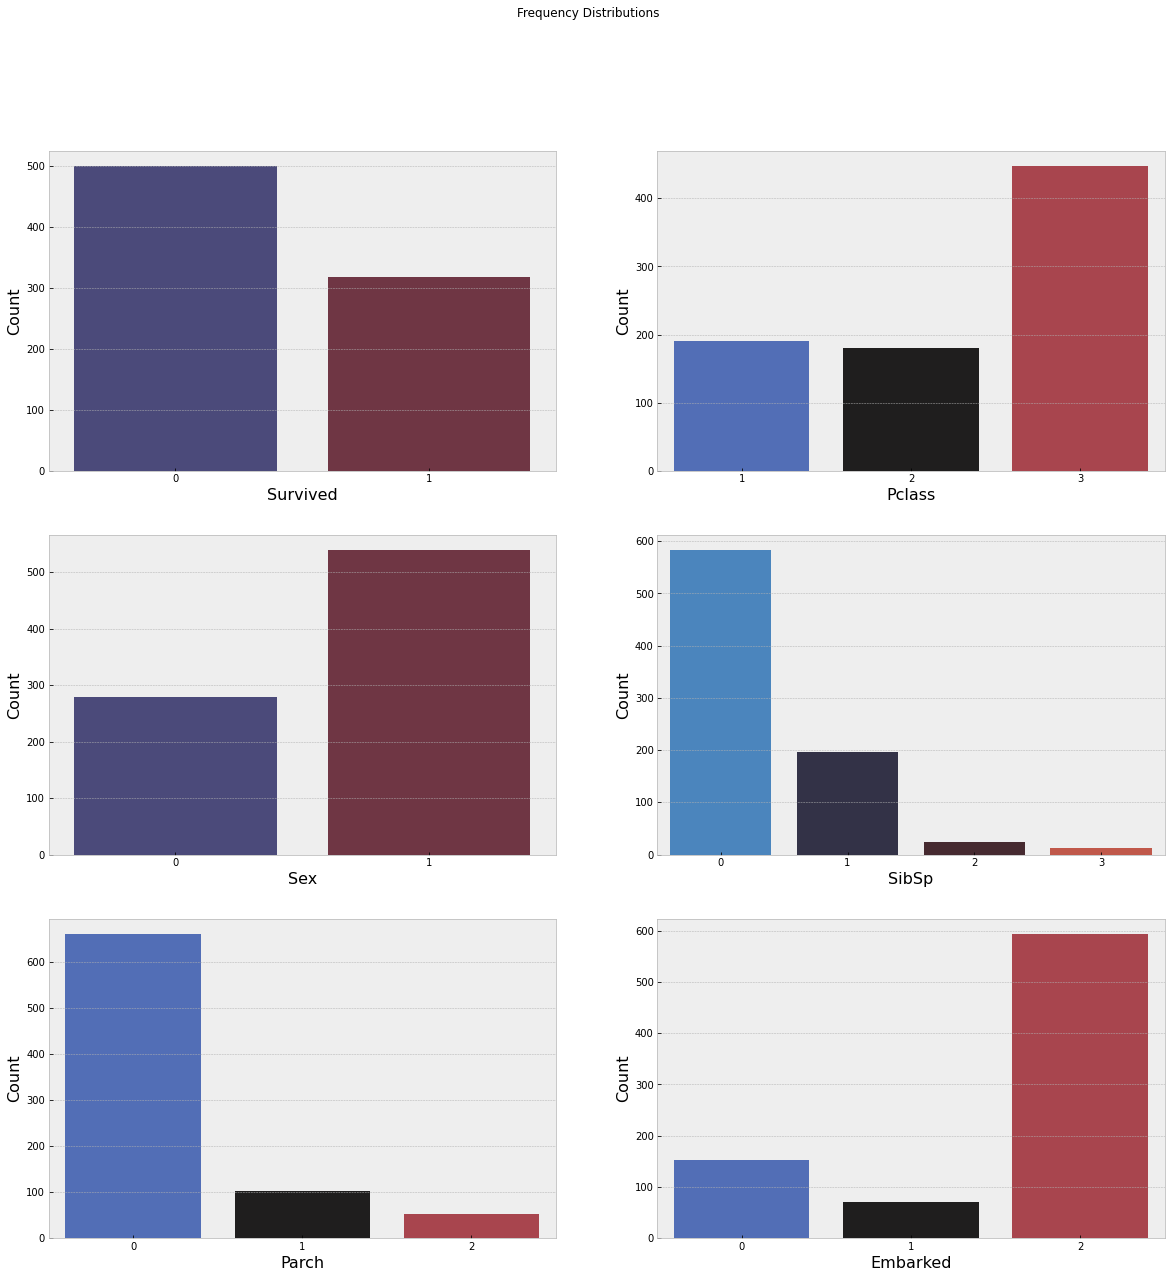

In [ ]:
# Creating countplots for our remaining categorical columns
columns = ['Survived', 'Pclass', 'Sex', 'SibSp',	'Parch', 'Embarked']


fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize=(20, 20))
fig.suptitle('Frequency Distributions')
axes_list = [ax1, ax2, ax3, ax4, ax5, ax6]

#iterating our columns as we plot
for i, col in enumerate(columns):
    sns.countplot(titan[col], ax=axes_list[i], palette='icefire')
    axes_list[i].set_xlabel(col, fontsize=16)
    axes_list[i].set_ylabel('Count', fontsize=16)

plt.show()    

In [ ]:
# Determining the standard deviation for our data

titan.std()

Survived     0.487765
Pclass       0.825137
Sex          0.474361
Age         12.342933
SibSp        0.619951
Parch        0.565859
Fare        29.733184
Embarked     0.789503
dtype: float64

In [ ]:
# Determining the skewness of our data

titan.skew()

Survived    0.457268
Pclass     -0.639191
Sex        -0.671699
Age         0.405592
SibSp       1.975774
Parch       2.118544
Fare        2.342849
Embarked   -1.273629
dtype: float64

In [ ]:
# Determining the kurtosis of our data

titan.kurt()

Survived   -1.795302
Pclass     -1.235895
Sex        -1.552623
Age         0.549113
SibSp       4.258315
Parch       3.306731
Fare        5.584661
Embarked   -0.182165
dtype: float64

### **Bivariate analysis**

In [ ]:
# Determining the correlation of our data

correlation = titan.corr()
correlation

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.319048,-0.553009,-0.074151,0.096403,0.202888,0.326829,-0.157142
Pclass,-0.319048,1.000000,0.133391,-0.404247,-0.054688,-0.080384,-0.689576,0.124844
Sex,-0.553009,0.133391,1.000000,0.095131,-0.201663,-0.254059,-0.239992,0.119011
Age,-0.074151,-0.404247,0.095131,1.000000,-0.143749,-0.250219,0.189152,0.004358
SibSp,0.096403,-0.054688,-0.201663,-0.143749,1.000000,0.306784,0.250832,-0.012974
Parch,0.202888,-0.080384,-0.254059,-0.250219,0.306784,1.000000,0.263038,-0.015551
Fare,0.326829,-0.689576,-0.239992,0.189152,0.250832,0.263038,1.000000,-0.196032
Embarked,-0.157142,0.124844,0.119011,0.004358,-0.012974,-0.015551,-0.196032,1.000000


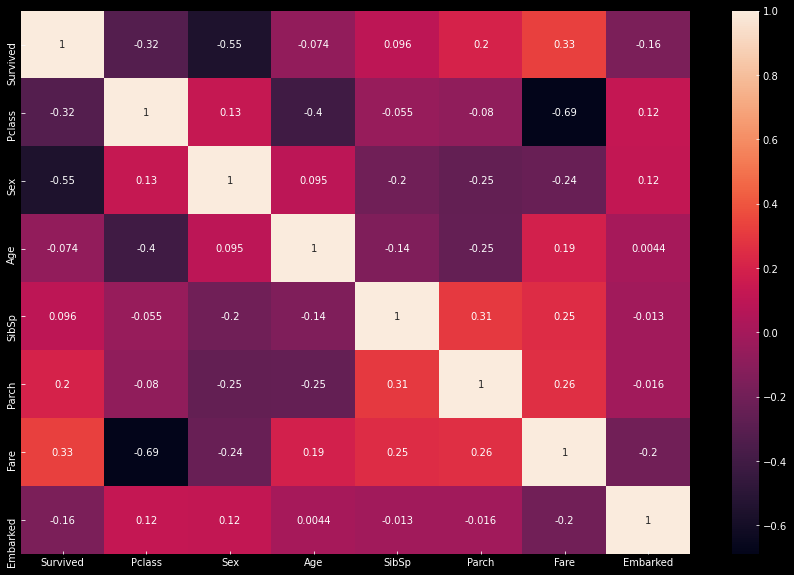

In [ ]:
# Plotting correlation values on a heatmap
plt.style.use('dark_background')

plt.figure(figsize = (15, 10))
sns.heatmap(correlation, annot=True)

In [ ]:
# Determining the VIF of our data to test for multicollinearity

vif = pd.DataFrame(np.linalg.inv(correlation.values), index = correlation.index, columns=correlation.columns)
vif

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.648306,0.461379,0.808106,0.248433,0.095723,-0.039575,-0.069335,0.091196
Pclass,0.461379,2.392338,0.183876,0.680863,-0.136929,-0.026271,1.462053,0.033406
Sex,0.808106,0.183876,1.530822,0.027349,0.161382,0.161458,0.132600,-0.047674
Age,0.248433,0.680863,0.027349,1.385858,0.117038,0.318676,0.010393,-0.046745
SibSp,0.095723,-0.136929,0.161382,0.117038,1.192874,-0.233188,-0.355908,-0.045498
Parch,-0.039575,-0.026271,0.161458,0.318676,-0.233188,1.280974,-0.318716,-0.069127
Fare,-0.069335,1.462053,0.132600,0.010393,-0.355908,-0.318716,2.278484,0.227830
Embarked,0.091196,0.033406,-0.047674,-0.046745,-0.045498,-0.069127,0.227830,1.059034


From our analysis, Pclass and Fare columns have the highest values at 2.392 and 2.278. This shows that the two columns mightbe highly dependent on each other as fare is influenced by the number of parents or children on the ship.

Therefore, we will drop one of the columns, which in the case will be the Pclass column since it is of less importance as compared to the Fare column.

In [ ]:
# We will drop our Pclass which is heavily dependent on our fare column

df = titan.drop(columns=['Pclass'])

correlations = df.corr()
VIF = pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)
VIF

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.559326,0.772645,0.117124,0.122131,-0.034508,-0.351302,0.084753
Sex,0.772645,1.516689,-0.024983,0.171906,0.163477,0.020226,-0.050242
Age,0.117124,-0.024983,1.192083,0.156008,0.326153,-0.405710,-0.056253
SibSp,0.122131,0.171906,0.156008,1.185036,-0.234691,-0.272225,-0.043586
Parch,-0.034508,0.163477,0.326153,-0.234691,1.280685,-0.302661,-0.068760
Fare,-0.351302,0.020226,-0.405710,-0.272225,-0.302661,1.384965,0.207415
Embarked,0.084753,-0.050242,-0.056253,-0.043586,-0.068760,0.207415,1.058568


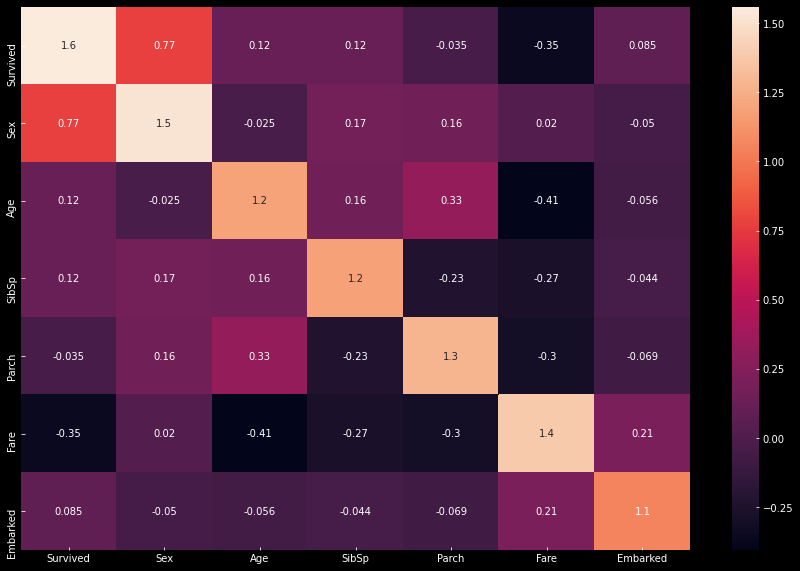

In [ ]:
plt.figure(figsize = (15, 10))
sns.heatmap(VIF, annot=True)

### **Multivariate Analysis**

In [ ]:
# Previewing our dataset

df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,1,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,0,1,35.0,0,0,8.0500,2


In [154]:
# We will use LDA(Linear Disciminant Analysis) to apply dimensionality reduction to our dataset

# After loading our dataset, we need to divide it into features and labels before creating training and testing models
# We will use our survived column as our label

X = titan.iloc[:, 1:6].values
y = titan.iloc[:, 0].values 

In [160]:
# Dividing the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [161]:
# Performing feature scaling on our data using Standard Scaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [207]:
# Performing LDA on our data, while using n_components to refer to the number of linear discriminates we want to retrieve

lda = LDA(n_components=5)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(1, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


In [208]:
# Using the random rorest classifier to evaluate the performance of PCA-reduced algorithms


classifier = RandomForestClassifier(max_depth=10, random_state=65) 
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [209]:
# Evaluating the performance of our algorithm 

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[89 11]
 [23 41]]
Accuracy0.7926829268292683


## Implementing the solution

In [215]:
# We will now use KNN classifier to create our model

from sklearn.neighbors import KNeighborsClassifier 
classifier = KNeighborsClassifier(n_neighbors=5) 
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [216]:
# Since we had already split our data and created our training and testing, we will ony need to train our algorithm 


y_pred1 = classifier.predict(X_test)

In [217]:
# We will then make a prediction using this algorithm

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

[[86 14]
 [21 43]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       100
           1       0.75      0.67      0.71        64

    accuracy                           0.79       164
   macro avg       0.78      0.77      0.77       164
weighted avg       0.78      0.79      0.78       164



## Challenging the solution.

In [213]:
# Reviewing our solutions

accuracy_score(y_test, y_pred1)

0.7865853658536586

From our analysis, we can see that our model hasn't performed as well as we expected it to. Our accuracy is 79% percent which is higher than our threshold of above 60%. However it is lower than our target of 80% which we had specified as our measure of success. 

Therefore, this might indicate that our algorithm may not be fit to make predictions in our data or different methods of improving model performance might be required.

## Follow-up questions

### a). Did we have the right data?


> We believe we had the right data, with the right information in the columns. However, the age column had too many missing values whse value we had to estimate.

### b). Do we need other data to answer our question?


> We believe that after analysis, our data was relevant enough to answer our question .

### c). Did we have the right question?

> We can conclude that we had the right question to help us cary out our analysis.